In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = [10,9,9.5,8.5,8,4]

# Outliers detection
## with std

In [3]:
data_std = np.std(data)
data_mean = np.mean(data)
cut_off = data_std * 2
    
lower_limit  = data_mean - cut_off 
upper_limit = data_mean + cut_off

for outlier in data:
    if outlier > upper_limit or outlier < lower_limit:
        print(outlier)

4


In [4]:
new_data = np.random.randn(50000)*20

In [5]:
len(new_data), new_data

(50000,
 array([  5.49042981,  -1.86085142, -18.28339111, ...,   2.53115003,
          7.33014737, -10.68593007]))

In [6]:
data_std = np.std(new_data)
data_mean = np.mean(new_data)
cut_off = data_std * 3
    
lower_limit  = data_mean - cut_off 
upper_limit = data_mean + cut_off

outliers = []
for outlier in new_data:
    if outlier > upper_limit or outlier < lower_limit:
        outliers.append(outlier)

In [7]:
len(outliers), data_std, data_mean

(156, 19.988586175807722, 0.1506268561816586)

## Boxplot

In [9]:
import seaborn as sns

### Interquartile Range (IQR)

![](boxplot.png)

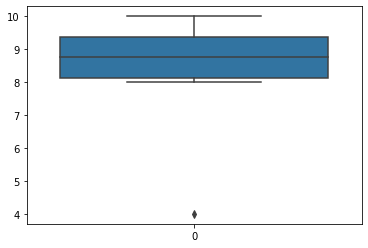

In [10]:
sns.boxplot(data=data)

## Boxplots and distribution

![](percentile2.png)

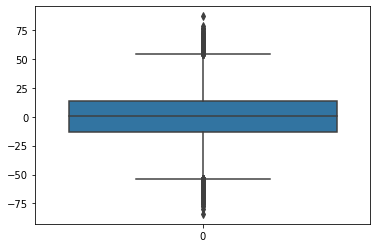

In [11]:
sns.boxplot(data=new_data)

## DBSCAN: density-based anomaly detection
### min_samples:  <b>minimum number of core points needed to form a cluster</b>
### eps: <b>maximum distance between two samples to be considered as in the same cluster</b>

![](dbscan.png)

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
data

[10, 9, 9.5, 8.5, 8, 4]

In [14]:
data = np.array(data).reshape(-1,1)
data

array([[10. ],
       [ 9. ],
       [ 9.5],
       [ 8.5],
       [ 8. ],
       [ 4. ]])

In [16]:
outlier_dbscan = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_dbscan.fit_predict(data)

In [17]:
clusters

array([ 0,  0,  0,  0,  0, -1])

In [18]:
#SKLearn labels the noisy points as (-1)
list(clusters).count(-1) # This is the total number of noisy points.

1

In [19]:
towd_data = np.random.randn(50000,2)*20 #bigger dataset, 2d now

In [20]:
towd_data, len(towd_data)

(array([[ -9.58532985, -30.71594097],
        [ 18.84323515, -28.36816536],
        [-12.38551078,  29.90226784],
        ...,
        [ 24.75293533,   7.48672802],
        [  9.67067037,   7.83435613],
        [  2.23142121,  46.52972489]]),
 50000)

In [21]:
#note the exec time!
eps = np.std(towd_data)

In [22]:
outlier_dbscan = DBSCAN(min_samples = 10, eps = eps)
clusters = outlier_dbscan.fit_predict(towd_data)
list(clusters).count(-1)

0

## Isolation Forest

In [23]:
from sklearn.ensemble import IsolationForest

In [25]:
data

array([[10. ],
       [ 9. ],
       [ 9.5],
       [ 8.5],
       [ 8. ],
       [ 4. ]])

In [24]:
#our data
clf = IsolationForest(random_state = 42, contamination= 'auto')
preds = clf.fit_predict(data)
preds

array([ 1,  1,  1,  1,  1, -1])

In [26]:
#bigger dataset 2d
clf = IsolationForest(max_samples=100, random_state = 42, contamination= 'auto')
preds = clf.fit_predict(towd_data)
list(preds).count(-1)

14109